In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
train.shape

(19237, 18)

In [4]:
train.duplicated().sum()

313

In [5]:
train = train.drop_duplicates(keep= 'first')
train.shape

(18924, 18)

In [6]:
train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
test = pd.read_csv('test.csv')
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [8]:
test.shape

(8245, 18)

In [9]:
test.isnull().sum()

ID                     0
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Price               8245
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [11]:
numerical_features = train.select_dtypes(exclude='object')
numerical_features.head()

,ID,Price,Prod. year,Cylinders,Airbags
0,45654403,13328,2010,6.0,12
1,44731507,16621,2011,6.0,8
2,45774419,8467,2006,4.0,2
3,45769185,3607,2011,4.0,0
4,45809263,11726,2014,4.0,4


In [12]:
categorical_features = train.select_dtypes(include ='object')
categorical_features.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver


------

In [13]:
train['Levy'].value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
2472       1
173        1
1599       1
3015       1
3894       1
Name: Levy, Length: 559, dtype: int64

In [14]:
train['Levy'] = train['Levy'].replace({'-' : np.nan})

In [15]:
train['Levy'] = train['Levy'].astype(float)

In [16]:
train['Levy'] = train['Levy'].fillna(train['Levy'].mean())

In [17]:
train['Levy'].value_counts()

906.299205     5709
765.000000      482
891.000000      453
639.000000      403
640.000000      398
               ... 
3273.000000       1
2909.000000       1
3739.000000       1
2628.000000       1
3292.000000       1
Name: Levy, Length: 559, dtype: int64

In [18]:
test['Levy'].value_counts()

-       2454
765      222
891      204
640      177
639      165
        ... 
1519       1
1526       1
1698       1
1346       1
1442       1
Name: Levy, Length: 434, dtype: int64

In [19]:
test['Levy'] = test['Levy'].replace({'-' : np.nan})

In [20]:
test['Levy'] = test['Levy'].astype(float)

In [21]:
test['Levy'] = test['Levy'].fillna(test['Levy'].mean())

In [22]:
test['Levy'].value_counts()

917.859955     2454
765.000000      222
891.000000      204
640.000000      177
639.000000      165
               ... 
2690.000000       1
1516.000000       1
1107.000000       1
2908.000000       1
644.000000        1
Name: Levy, Length: 434, dtype: int64

In [23]:
train['Levy'] = train['Levy'].astype(float)
test['Levy'] = test['Levy'].astype(float)

---------

In [24]:
train['Engine volume'].value_counts()

2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
0.3 Turbo       1
0.8 Turbo       1
7.3             1
5.8             1
5.7 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [25]:
train['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [26]:
test['Engine volume'].unique()

array(['2.0 Turbo', '2.4', '1.5', '3.2', '1.6', '4.6', '3.5', '2', '1.8',
       '2.5', '1.7', '2.2 Turbo', '2.3 Turbo', '4', '1.3', '3',
       '1.4 Turbo', '2.2', '3.0 Turbo', '3.3', '2.9 Turbo', '1.4',
       '3.2 Turbo', '4.8', '3.6', '2.7', '1.8 Turbo', '1', '1.5 Turbo',
       '2.4 Turbo', '0.7', '5.5', '1.7 Turbo', '4.4', '4.7', '5', '1.2',
       '2.8', '3.8', '1.6 Turbo', '2.6', '5.3', '3.7', '5.7', '6.6',
       '1.3 Turbo', '2.3', '0.2', '4.7 Turbo', '2.5 Turbo', '6.4', '5.6',
       '1.9 Turbo', '3.4', '5.5 Turbo', '6.7', '0.4', '4.4 Turbo',
       '2.7 Turbo', '4.2', '2.1', '2.1 Turbo', '6.2', '0.8 Turbo', '0',
       '6', '4.3', '1.9', '1.1', '4.6 Turbo', '3.1', '1.2 Turbo', '0.8',
       '3.5 Turbo', '0.6 Turbo', '4.5 Turbo', '6.3', '6.1', '4.8 Turbo',
       '0.5', '4.0 Turbo', '3.6 Turbo', '10.8', '0.7 Turbo', '5.4',
       '3.7 Turbo', '4.2 Turbo', '4.5', '0.6', '2.8 Turbo', '2.9',
       '0.3 Turbo', '1.0 Turbo', '5.2', '6.0 Turbo', '3.9', '2.6 Turbo'],
      dtype=o

In [27]:
train['Additional Features'] = train['Engine volume'].replace(['2.0 Turbo', '2.2 Turbo','3.0 Turbo','1.4 Turbo','1.5 Turbo', '1.6 Turbo','2.3 Turbo','2.8 Turbo','1.8 Turbo', '2.4 Turbo', '3.5 Turbo', '3.2 Turbo','1.3 Turbo','2.5 Turbo','1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.2 Turbo','4.8 Turbo', '4.6 Turbo','1.2 Turbo','1.7 Turbo', '6.3 Turbo', '2.7 Turbo','2.9 Turbo', '4.0 Turbo','3.6 Turbo','3.7 Turbo','5.5 Turbo','2.1 Turbo','0.7 Turbo', '0.6 Turbo','1.0 Turbo', '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo','5.7 Turbo','0.4 Turbo', '5.4 Turbo', '0.3 Turbo','1.1 Turbo'],'Turbo')

In [28]:
train['Additional Features'] = train['Additional Features'].replace(['3.5','3','1.3','2.5','2','1.8','2.4','4','1.6','3.3','4.7','1.5','4.4','3.6','2.3','2.2','1.4','5.5','3.2','3.8','4.6','1.2','5', '1.7', '2.9', '0.5','1.9','2.7','4.8','5.3','0.4','2.8','1.1','2.1','0.7','5.4','3.7','1','2.6','5.7','3.4','4.3','4.2','5.9','6.8','4.5','0.6','7.3','0.1','6.3','6.4','5.2','5.8','0.8', '6.7', '6.2', '0', '20', '0.3', '0.2','5.6', '6', '3.9', '0.9'],'Non-Turbo')

In [29]:
train['Engine volume'] = train['Engine volume'].str.replace('Turbo','')

In [30]:
train['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 ', '2.2 ', '4.7', '1.5', '4.4', '3.0 ', '1.4 ', '3.6', '2.3',
       '1.5 ', '1.6 ', '2.2', '2.3 ', '1.4', '5.5', '2.8 ', '3.2', '3.8',
       '4.6', '1.2', '5', '1.7', '2.9', '0.5', '1.8 ', '2.4 ', '3.5 ',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 ', '1.1', '2.1',
       '0.7', '5.4', '1.3 ', '3.7', '1', '2.5 ', '2.6', '1.9 ', '4.4 ',
       '4.7 ', '0.8', '0.2 ', '5.7', '4.8 ', '4.6 ', '6.7', '6.2', '1.2 ',
       '3.4', '1.7 ', '6.3 ', '2.7 ', '4.3', '4.2', '2.9 ', '0', '4.0 ',
       '20', '3.6 ', '0.3', '3.7 ', '5.9', '5.5 ', '0.2', '2.1 ', '5.6',
       '6', '0.7 ', '0.6 ', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 ',
       '6.3', '4.5 ', '0.8 ', '4.2 ', '3.1', '5.0 ', '6.4', '3.9', '5.7 ',
       '0.9', '0.4 ', '5.4 ', '0.3 ', '5.2', '5.8', '1.1 '], dtype=object)

In [31]:
test['Additional Features'] = test['Engine volume'].replace(['2.0 Turbo', '2.2 Turbo','3.0 Turbo','1.4 Turbo','1.5 Turbo', '1.6 Turbo','2.3 Turbo','2.8 Turbo','1.8 Turbo', '2.4 Turbo', '3.5 Turbo', '3.2 Turbo','1.3 Turbo','2.5 Turbo','1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.2 Turbo','4.8 Turbo', '4.6 Turbo','1.2 Turbo','1.7 Turbo', '6.3 Turbo', '2.7 Turbo','2.9 Turbo', '4.0 Turbo','3.6 Turbo','3.7 Turbo','5.5 Turbo','2.1 Turbo','0.7 Turbo', '0.6 Turbo','1.0 Turbo', '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo','5.7 Turbo','0.4 Turbo', '5.4 Turbo', '0.3 Turbo','1.1 Turbo'],'Turbo')

In [32]:
test['Additional Features'] = test['Additional Features'].replace(['3.5','3','1.3','2.5','2','1.8','2.4','4','1.6','3.3','4.7','1.5','4.4','3.6','2.3','2.2','1.4','5.5','3.2','3.8','4.6','1.2','5', '1.7', '2.9', '0.5','1.9','2.7','4.8','5.3','0.4','2.8','1.1','2.1','0.7','5.4','3.7','1','2.6','5.7','3.4','4.3','4.2','5.9','6.8','4.5','0.6','7.3','0.1','6.3','6.4','5.2','5.8','0.8', '6.7', '6.2', '0', '20', '0.3', '0.2','5.6', '6', '3.9', '0.9'],'Non-Turbo')

In [33]:
test['Engine volume'] = test['Engine volume'].str.replace('Turbo','')

In [34]:
test['Engine volume'].unique()

array(['2.0 ', '2.4', '1.5', '3.2', '1.6', '4.6', '3.5', '2', '1.8',
       '2.5', '1.7', '2.2 ', '2.3 ', '4', '1.3', '3', '1.4 ', '2.2',
       '3.0 ', '3.3', '2.9 ', '1.4', '3.2 ', '4.8', '3.6', '2.7', '1.8 ',
       '1', '1.5 ', '2.4 ', '0.7', '5.5', '1.7 ', '4.4', '4.7', '5',
       '1.2', '2.8', '3.8', '1.6 ', '2.6', '5.3', '3.7', '5.7', '6.6',
       '1.3 ', '2.3', '0.2', '4.7 ', '2.5 ', '6.4', '5.6', '1.9 ', '3.4',
       '5.5 ', '6.7', '0.4', '4.4 ', '2.7 ', '4.2', '2.1', '2.1 ', '6.2',
       '0.8 ', '0', '6', '4.3', '1.9', '1.1', '4.6 ', '3.1', '1.2 ',
       '0.8', '3.5 ', '0.6 ', '4.5 ', '6.3', '6.1', '4.8 ', '0.5', '4.0 ',
       '3.6 ', '10.8', '0.7 ', '5.4', '3.7 ', '4.2 ', '4.5', '0.6',
       '2.8 ', '2.9', '0.3 ', '1.0 ', '5.2', '6.0 ', '3.9', '2.6 '],
      dtype=object)

In [35]:
train['Engine volume'] = train['Engine volume'].astype(float)
test['Engine volume'] = test['Engine volume'].astype(float)

--------

In [36]:
train['Mileage'].value_counts()

0 km         714
200000 km    181
150000 km    159
160000 km    120
180000 km    117
            ... 
147947 km      1
140171 km      1
72895 km       1
20147 km       1
92825 km       1
Name: Mileage, Length: 7687, dtype: int64

In [37]:
train['Mileage']=train['Mileage'].str.replace('km',' ')

In [38]:
train['Mileage']=train['Mileage'].astype(int)

In [39]:
train['Mileage'].value_counts()

0         714
200000    181
150000    159
160000    120
180000    117
         ... 
171300      1
136469      1
42496       1
48400       1
137213      1
Name: Mileage, Length: 7687, dtype: int64

In [40]:
test['Mileage'].value_counts()

0 km         292
200000 km     72
150000 km     60
180000 km     59
120000 km     54
            ... 
351954 km      1
21990 km       1
120612 km      1
45252 km       1
236763 km      1
Name: Mileage, Length: 3978, dtype: int64

In [41]:
test['Mileage']=test['Mileage'].str.replace('km',' ')

In [42]:
test['Mileage']=test['Mileage'].astype(int)

In [43]:
test['Mileage'].value_counts()

0         292
200000     72
150000     60
180000     59
120000     54
         ... 
148067      1
209208      1
119401      1
113268      1
186365      1
Name: Mileage, Length: 3978, dtype: int64

--------------

In [44]:
train['Drive wheels'].value_counts()

Front    12695
4x4       3969
Rear      2260
Name: Drive wheels, dtype: int64

In [45]:
train['Drive wheels'] = train['Drive wheels'].replace({'4x4':'4-WD'})

In [46]:
test['Drive wheels'] = test['Drive wheels'].replace({'4x4':'4-WD'})

In [47]:
test['Drive wheels'].value_counts()

Front    5500
4-WD     1744
Rear     1001
Name: Drive wheels, dtype: int64

----------

In [48]:
train['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [49]:
train['Doors'] = train['Doors'].replace({'04-May':4,'02-Mar':2, '>5': 6})

In [50]:
test['Doors'].unique()

array(['02-Mar', '04-May', '>5'], dtype=object)

In [51]:
test['Doors'] = test['Doors'].replace({'04-May':4,'02-Mar':2, '>5': 6})

In [52]:
test['Doors'].value_counts()

4    7841
2     352
6      52
Name: Doors, dtype: int64

In [53]:
train['Doors'] = train['Doors'].astype(int)
test['Doors'] = test['Doors'].astype(int)

----------

In [54]:
newtrain = train
newtest = test

In [55]:
newtrain = newtrain.drop(['ID', 'Manufacturer', 'Model'], axis = 1)
newtest = newtest.drop(['ID', 'Manufacturer', 'Model', 'Price'], axis = 1)

In [56]:
newtrain.shape

(18924, 16)

In [57]:
newtest.shape

(8245, 15)

In [58]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                18924 non-null  int64  
 1   Levy                 18924 non-null  float64
 2   Prod. year           18924 non-null  int64  
 3   Category             18924 non-null  object 
 4   Leather interior     18924 non-null  object 
 5   Fuel type            18924 non-null  object 
 6   Engine volume        18924 non-null  float64
 7   Mileage              18924 non-null  int32  
 8   Cylinders            18924 non-null  float64
 9   Gear box type        18924 non-null  object 
 10  Drive wheels         18924 non-null  object 
 11  Doors                18924 non-null  int32  
 12  Wheel                18924 non-null  object 
 13  Color                18924 non-null  object 
 14  Airbags              18924 non-null  int64  
 15  Additional Features  18924 non-null 

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [60]:
cat_features = newtrain.select_dtypes(include= 'object')

In [61]:
for i in cat_features:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

In [62]:
newtrain.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Additional Features
0,13328,1399.000000,2010,4,1,2,3.5,186005,6.0,0,0,4,0,12,12,0
1,16621,1018.000000,2011,4,0,5,3.0,192000,6.0,2,0,4,0,1,8,0
2,8467,906.299205,2006,3,0,5,1.3,200000,4.0,3,1,4,1,1,2,0
3,3607,862.000000,2011,4,1,2,2.5,168966,4.0,0,0,4,0,14,0,0
4,11726,446.000000,2014,3,1,5,1.3,91901,4.0,0,1,4,0,12,4,0


In [63]:
newtest.head()

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Additional Features
0,917.859955,2012,3,0,1,2.0,0,4,1,1,2,0,7,10,6
1,917.859955,2012,9,1,5,2.4,26000,4,2,1,4,0,7,10,5
2,917.859955,2005,9,0,5,1.5,168000,4,0,1,4,1,13,8,5
3,975.000000,2012,4,1,5,3.2,143000,6,0,0,4,0,2,12,5
4,917.859955,1993,3,0,5,1.6,200000,4,1,1,4,0,1,0,5


In [69]:
x = newtrain.drop('Price', axis = 1)
y = newtrain['Price']

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [71]:
from sklearn.metrics import mean_squared_error

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred = lr.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

23643.257583367948


In [85]:
x_train = newtrain.drop('Price', axis = 1)
y_train = newtrain['Price']
x_test = newtest
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred = lr.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Price' : y_pred})
solution.to_csv('LR.csv', index = False)

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,criterion='mse')
y_pred = rf.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

139255.44451540028


In [69]:
from sklearn.ensemble import BaggingRegressor
bagg = BaggingRegressor()
y_pred = bagg.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

76317.67952209384


In [72]:
from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor()
y_pred = adab.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

21997.829357147555


In [73]:
print(adab.score(x_train, y_train))
print(adab.score(x_test, y_test))

0.9938370498161833
0.1367861803533179


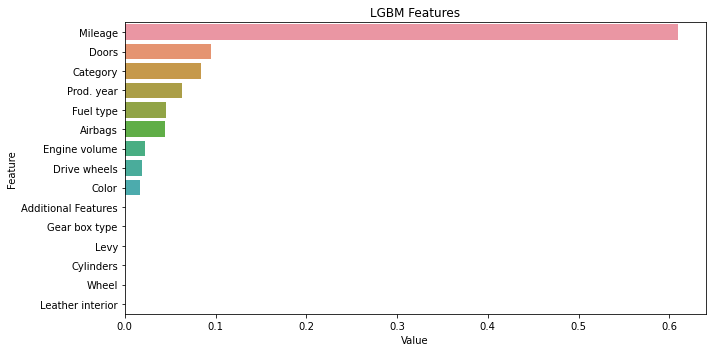

In [75]:
feature_imp = pd.DataFrame(sorted(zip(adab.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [77]:
x_train = newtrain.drop(['Price', 'Leather interior', 'Wheel', 'Cylinders', 'Levy', 'Gear box type', 'Additional Features'], axis = 1)
y_train = newtrain['Price']
x_test = newtest.drop(['Leather interior', 'Wheel', 'Cylinders', 'Levy', 'Gear box type', 'Additional Features'], axis = 1)

In [68]:
from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor()
y_pred = adab.fit(x_train, y_train).predict(x_test)

In [ ]:
solution = pd.DataFrame({'Price' : y_pred})
solution.to_csv('ADAB1.csv', index = False)